# Model-Based Monte Carlo

### Price Evolution - Geometric Brownian Motion


$\frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma \sqrt{dt} \xi_t$

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd


def returns_to_prices(returns, s_0):
    return s_0*(1+returns).cumprod()

def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps,n_scenarios))
    rets = mu*dt+sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    return returns_to_prices(rets, s_0)
    
    

In [3]:
# Generate three scenarios as an example
p = gbm(n_scenarios=3)

<AxesSubplot:>

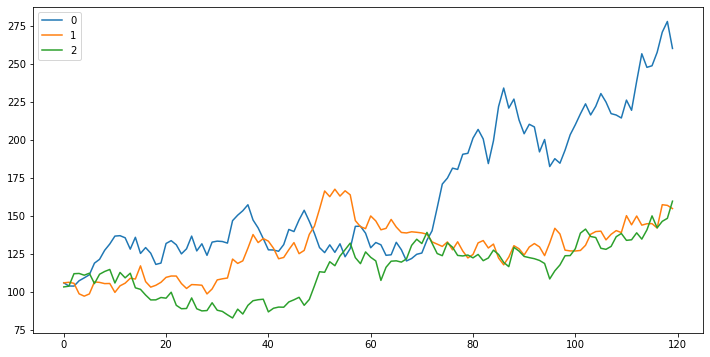

In [4]:
p.plot(figsize=(12,6))

<AxesSubplot:>

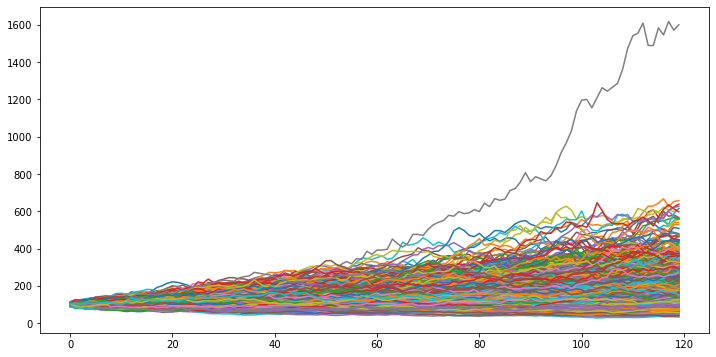

In [5]:
p = gbm(n_scenarios=1000)
p.plot(figsize=(12,6), legend=False)

In [6]:
# Attempt to define more efficient version of GBM by exploiting features of random.normal

def efficient_gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(size=(n_steps,n_scenarios), loc=1+mu*dt, scale=sigma*np.sqrt(dt))
    #fix the first row
    rets_plus_1[0] = 1
    return s_0*pd.DataFrame(rets_plus_1).cumprod()
    

In [7]:
# Timimg tests do not show a significant improvement

In [8]:
%timeit gbm(n_years=5, n_scenarios=1000)

2.05 ms ± 287 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%timeit efficient_gbm(n_years=5, n_scenarios=1000)

1.73 ms ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<AxesSubplot:>

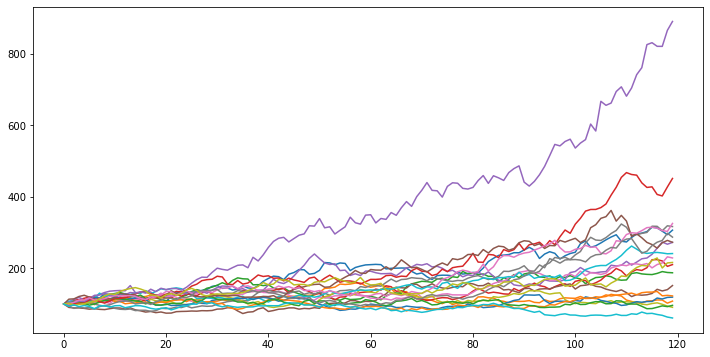

In [14]:
efficient_gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [15]:
from fintools.asset_model import geometric_brownian_motion, show_gbm

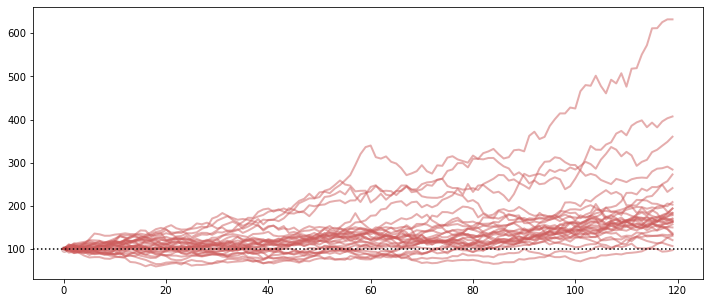

In [16]:
show_gbm(30, 0.07,0.14)

In [17]:
import ipywidgets as widgets

gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios=(1,20,5),
                                   mu=(-0.2,0.2,.01),
                                   sigma=(0,.3,.01)
                                  )

In [18]:
display(gbm_controls)

interactive(children=(IntSlider(value=6, description='n_scenarios', max=20, min=1, step=5), FloatSlider(value=…

In [26]:
from fintools import backtest_cppi

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, risk_free_rate=0.03, y_max=100):
    s_0=100
    risky_returns = geometric_brownian_motion(scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, years=10)
    btr = backtest_cppi(risky_returns=risky_returns, risk_free_rate=risk_free_rate, 
                        multiplier=m,start_value=s_0,cushion_ratio=floor)
    wealth=btr['wealth']
    y_max = wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, color='indianred', alpha=0.3, figsize=(10,5))
    ax.axhline(y=s_0,ls=':',color='black')
    ax.axhline(y=s_0*floor,ls='--',color='red')
    ax.set_ylim(top=y_max)

## Test CPPI with returns generated by Monte Carlo. 

Note the effect of the floor

In [28]:
cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                   mu=(0.0,0.2,.01),
                                   sigma=(0,.3,.05),
                                    floor=(0,2,0.1),
                                    m=(1,5,0.5),
                                    risk_free_rate=(0,0.05,0.01),
                                    y_max=widgets.IntSlider(min=0,max=100, step=1, value=100, description='Zoom Y Axis')
                                  )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…